In [1]:
# Nico T. Solitana
# De La Salle University Manila

import pandas as pd 
import numpy as np 
from data_cleaner import *
from gensim_vectorizer import *
from sklearn.model_selection import train_test_split
from training_testing import *

In [2]:
# Load Dataset
data = pd.read_csv('Dataset\\twitter_gender_data_filtered.csv')
data.head()

,gender,description,fav_number,text,tweet_count
0,male,PhD Student (Bioinformatics),3,Mysterious space junk is hurtling towards Eart...,1
1,male,"'The greater the power, the more dangerous the...",0,{Leaning against the wall outside the ladies d...,2
2,male,"Teacher. Fields: Biblical Studies, Ancient Nea...",0,"@BiblePlaces, 1 Sinai inscription (1500 BC) I ...",3
3,male,"Doctor who,\nswimmer,\ngamer,\nmusic lover,\nB...",0,I hate homework like why can't we just come ho...,3
4,female,A mystery to unravel.,0,@humble Plans to implement PayPal before the 2...,3


In [3]:
# Data Cleaning
# Removal of punctuations, stopwords and non-english words, Tokenization and Lemmatization
download_necessary_functions()
data['description_clean'] = data['description'].apply(lambda x: clean_text(x))
data['text_clean'] = data['text'].apply(lambda x: clean_text(x))
data['merge'] = data['description_clean'] + data['text_clean']


In [4]:
# Trained own model
w2v_model = CreateW2VModel(data)
X = GetVectorValues(w2v_model.wv, data)
y = data

c:\Users\u721775\Documents\DebugFiles\nlp\Text_Classification\gensim_vectorizer.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([np.array([model[i] for i in ls if i in words])


In [9]:
# Trained own model
# To further improve classification, convert tokens to Vectors and split for training and testing
# based on category male and female
male = pd.DataFrame(data[data['gender']=='male'])
female = pd.DataFrame(data[data['gender']=='female'])

X = (GetVectorValues(CreateW2VModel(male).wv, male)).append(GetVectorValues(CreateW2VModel(female).wv, female))
y = male.append(female)

c:\Users\u721775\Documents\DebugFiles\nlp\Text_Classification\gensim_vectorizer.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([np.array([model[i] for i in ls if i in words])


In [19]:
# Load word2vec embeddings
model = LoadModel()

In [14]:
# Pre-trained only
# Convert tokens to Vectors and split for training and testing
X = GetVectorValues(model, data)

c:\Users\u721775\Documents\DebugFiles\nlp\Text_Classification\gensim_vectorizer.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([np.array([model[i] for i in ls if i in words])


In [20]:
# Pre-trained only
# To further improve classification, convert tokens to Vectors and split for training and testing
# based on category male and female
male = pd.DataFrame(data[data['gender']=='male'])
female = pd.DataFrame(data[data['gender']=='female'])

X = (GetVectorValues(model, male)).append(GetVectorValues(model, female))
y = male.append(female)

c:\Users\u721775\Documents\DebugFiles\nlp\Text_Classification\gensim_vectorizer.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([np.array([model[i] for i in ls if i in words])


In [23]:
# Pre-trained model + Trained model
# Convert tokens to Vectors and split for training and testing
X = GetVectorValues(MergePretrainedTrainedModel(model, data).wv, data)

c:\Users\u721775\Documents\DebugFiles\nlp\Text_Classification\gensim_vectorizer.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([np.array([model[i] for i in ls if i in words])


In [29]:
# # Pre-trained model + Trained model
# To further improve classification, convert tokens to Vectors and split for training and testing
# based on category male and female
male = pd.DataFrame(data[data['gender']=='male'])
female = pd.DataFrame(data[data['gender']=='female'])

X = (GetVectorValues(MergePretrainedTrainedModel(model, male).wv, male)).append(GetVectorValues                    
            (MergePretrainedTrainedModel(model, female).wv, female))
y = male.append(female)

In [30]:
# Splitting dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y['gender'], test_size=0.1)

In [57]:
# LOGISTIC REGRESSION
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: LogisticRegression(solver='lbfgs',max_iter=500))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))


[0.99397187 0.99665104 0.99396783 0.99463807 0.99664879]
Accuracy: 0.993 FScore: 0.993 Precision: 0.998 Recall: 0.988


In [59]:
# RANDOM FOREST
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: RandomForestClassifier(n_estimators=200, max_depth=80, n_jobs=-1))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))


[1.         0.99933021 0.99865952 0.99932976 1.        ]
Accuracy: 0.999 FScore: 0.999 Precision: 0.998 Recall: 1.0


In [61]:
# SVM
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: LinearSVC(C = 0.1, random_state=0))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))


[0.98191561 0.98861353 0.98726542 0.98458445 0.98927614]
Accuracy: 0.989 FScore: 0.989 Precision: 1.0 Recall: 0.979


In [31]:
# GRADIENT BOOST
# Model Building, Cross Validation and Prediction
SetTrainTest(X_train, X_test, y_train, y_test)
TrainTestModel(lambda: GradientBoostingClassifier(learning_rate=1, max_depth=10, random_state=0))

# Check Model Performance
accuracy, cf_matrix, f1_score, precision, recall = GetModelPerformance()
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, f1_score, precision, recall))

[0.99732083 1.         0.99932976 0.99865952 0.99865952]
Accuracy: 0.998 FScore: 0.998 Precision: 0.995 Recall: 1.0


In [73]:
# EXTREME GRADIENT BOOST
# Model Building, Cross Validation and Prediction
from xgboost import XGBClassifier
from xgboost import cv
import xgboost as xgb

#k_fold = KFold(n_splits=5)
cls = XGBClassifier(learning_rate=1, max_depth=3, n_estimators=50, n_jobs=-1)
model = cls.fit(X_train, y_train)
predicted = model.predict(X_test)

C:\Users\u721775\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[12:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\u721775\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies a

In [74]:
# Model Evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

accuracy = round((predicted == y_test).sum()/len(predicted), 3)
cf_matrix = confusion_matrix(y_test, predicted)
fscore = round(
    f1_score(y_test, predicted, pos_label='female', average='binary'), 3)
precision = round(precision_score(
    y_test, predicted, pos_label='female', average='binary'), 3)
recall = round(recall_score(
    y_test, predicted, pos_label='female', average='binary'), 3)
print('Accuracy: {} FScore: {} Precision: {} Recall: {}'.format(accuracy, fscore, precision, recall))

Accuracy: 0.464 FScore: 0.471 Precision: 0.488 Recall: 0.455


[Text(33.0, 0.5, 'True'), Text(0.5, 15.0, 'Predicted')]

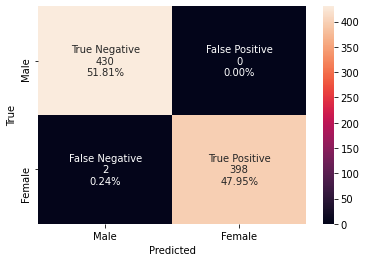

In [32]:
import seaborn as sns
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
categories = ['Male', 'Female']
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='')
ax.set_xticklabels(categories)
ax.set_yticklabels(categories)
ax.set(ylabel="True", xlabel="Predicted")

In [21]:
#####################################
# TESTING ONLY. TO BE DELETED.
#####################################
m_vect = CreateW2VModel(male)
f_vect = CreateW2VModel(female)

print(m_vect.wv.most_similar("sing"))
print(f_vect.wv.most_similar("sing"))

[('yo', 0.9841257929801941), ('control', 0.9839769005775452), ('laugh', 0.983803391456604), ('end', 0.9837515950202942), ('price', 0.9836487770080566), ('behind', 0.9835866093635559), ('hope', 0.9834989905357361), ('owner', 0.9834863543510437), ('b', 0.983471691608429), ('random', 0.9833306074142456)]
[('leave', 0.9940647482872009), ('worst', 0.9939712882041931), ('ε', 0.9939566254615784), ('feeling', 0.9939447641372681), ('dad', 0.9939060211181641), ('proud', 0.9938929080963135), ('bc', 0.993882954120636), ('year', 0.9938660264015198), ('enthusiast', 0.9938621520996094), ('please', 0.9938554167747498)]
